# Financial Data Analysis and Visualization

This notebook demonstrates how to collect financial data, perform analysis, and visualize trends using Python. We will use libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn`.

# Import Libraries

First, we import the necessary libraries.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

We'll use the yfinance library to collect historical stock price data. Let's fetch data for a specific stock (e.g., Apple Inc. - AAPL).

In [ ]:
# Define the stock symbol and time period
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch historical data
df = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


# Data Exploration

Next, we explore the dataset to understand its structure and content.

In [ ]:
# Display the shape of the dataframe
df.shape

(1006, 6)

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [ ]:
# Display summary statistics
df.describe().round(1)

,Open,High,Low,Close,Adj Close,Volume
count,1006.0,1006.0,1006.0,1006.0,1006.0,1006.0
mean,140.7,142.3,139.1,140.8,139.0,98952110.7
std,33.3,33.4,33.2,33.3,33.6,54396526.7
min,57.0,57.1,53.2,56.1,54.6,24048300.0
25%,123.7,125.0,122.2,123.6,121.3,64076750.0
50%,145.5,147.3,144.1,145.9,143.9,84675400.0
75%,166.3,168.1,164.8,166.2,164.5,115506875.0
max,198.0,199.6,197.0,198.1,197.6,426510000.0


# Data Cleaning
Ensure there are no missing values.

In [ ]:
# Check for missing values
missing_values = df.isna().sum()

# Display missing values
print("Missing values per column:")
print(missing_values)

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Data Visualization
We'll wisualize the historical stock prices and other indicators.

## Closing Price

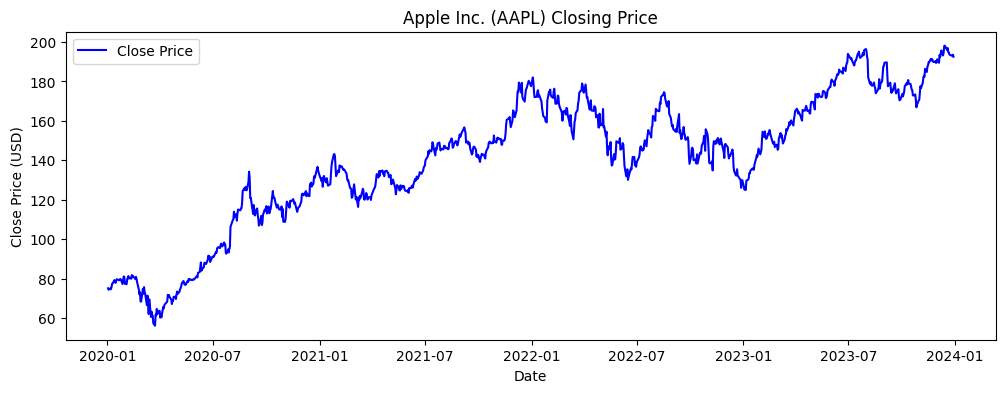

In [ ]:
# Plot close price
figsize=(12, 4)
plt.figure(figsize=figsize)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Apple Inc. (AAPL) Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

## Moving Averages
Calculate and plot moving averages to analyze trends.

In [ ]:
# Calculate moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

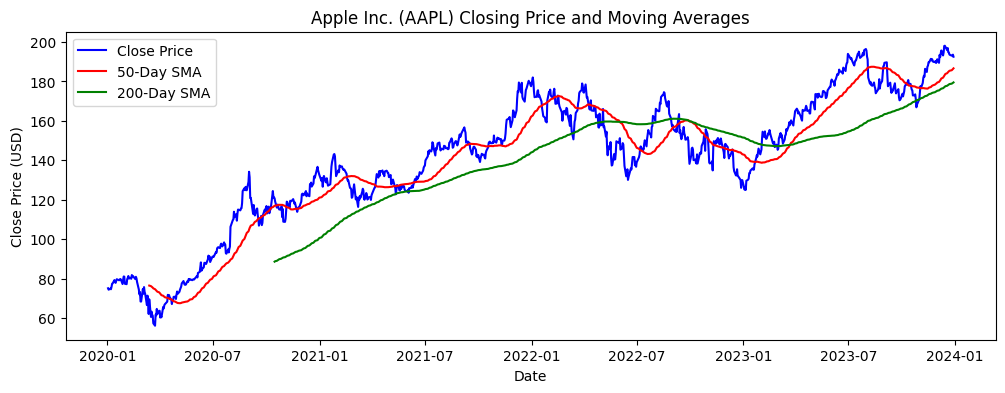

In [ ]:
# Plot closing price and moving averages
plt.figure(figsize=figsize)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_50'], label='50-Day SMA', color='red')
plt.plot(df.index, df['SMA_200'], label='200-Day SMA', color='green')
plt.title('Apple Inc. (AAPL) Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

## Volume Traded
Ploting the trading volume to understand market activity.

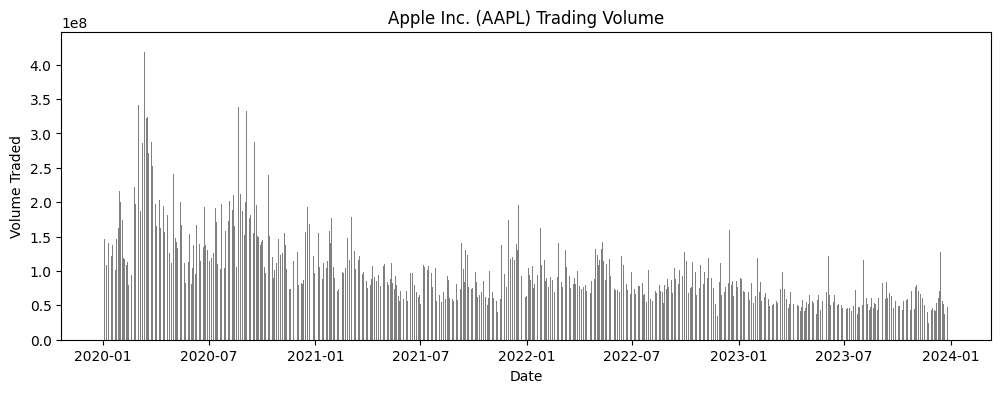

In [ ]:
plt.figure(figsize=figsize)
plt.bar(df.index, df['Volume'], color='grey')
plt.title('Apple Inc. (AAPL) Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.show()

# Bollinger Bands

In [ ]:
# Calculate Bollinger Bands
df['20 Day MA'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

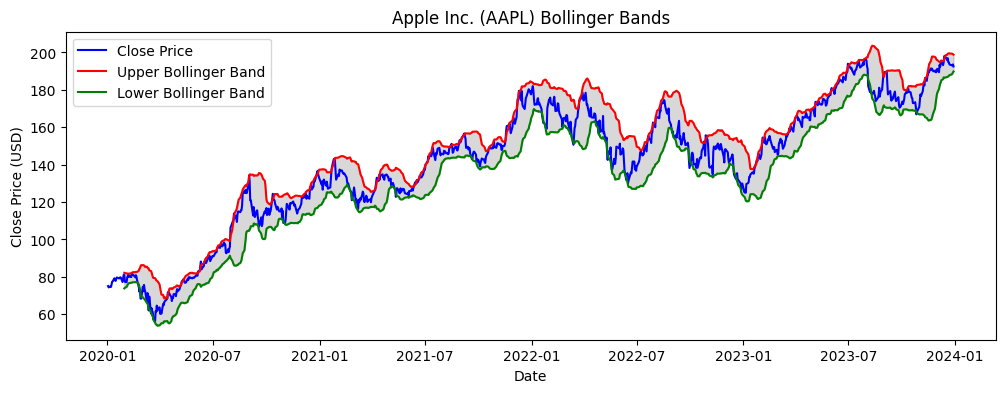

In [ ]:
# Plot closing price and Bollinger Bands
plt.figure(figsize=figsize)
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Upper Band'], label='Upper Bollinger Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Bollinger Band', color='green')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='grey', alpha=0.3)
plt.title('Apple Inc. (AAPL) Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Financial Metrics


## Daily Returns
Calculate and plot the daily returns.

In [ ]:
df['Return_1D'] = df['Adj Close'].pct_change()

Text(0, 0.5, 'Daily Return')

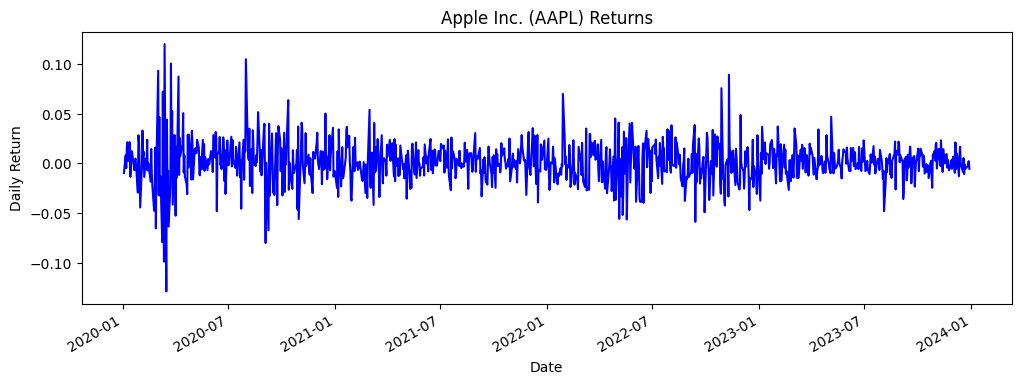

In [ ]:
df['Return_1D'].plot(figsize=figsize, color='blue')
plt.title('Apple Inc. (AAPL) Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')

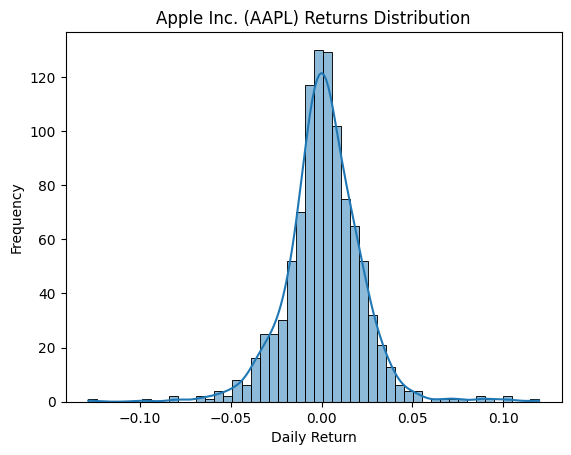

In [ ]:
# plot the distribution of returns
sns.histplot(df['Return_1D'], bins=50, kde=True)
plt.title('Apple Inc. (AAPL) Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

## Cumulative Returns
Calculate and plot cumulative returns to understand the overall performance.

In [ ]:
# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Return_1D']).cumprod()

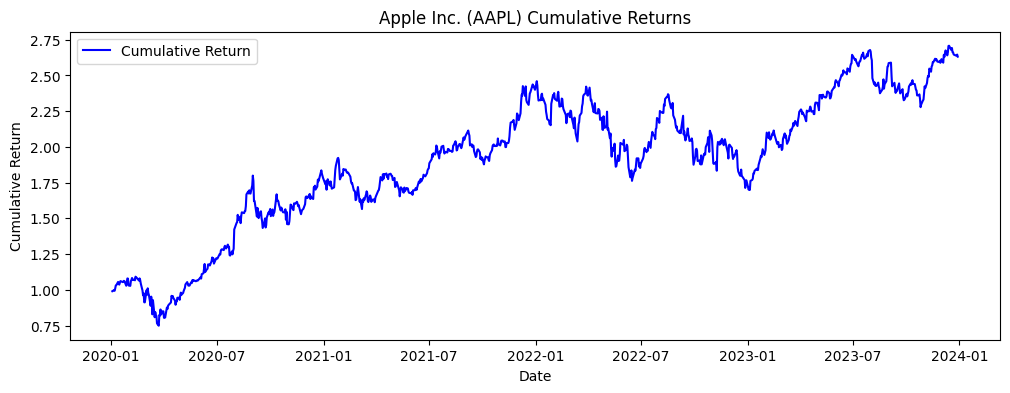

In [ ]:
# Plot cumulative returns
plt.figure(figsize=figsize)
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Apple Inc. (AAPL) Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Correlation Analysis
In statistics, Correlation usually refers to the degree to which a pair of variables are linearly related. Next, we examine the correlation between different financial indicators.

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['Close', 'Volume', 'SMA_50', 'SMA_200', 'Return_1D']].corr()

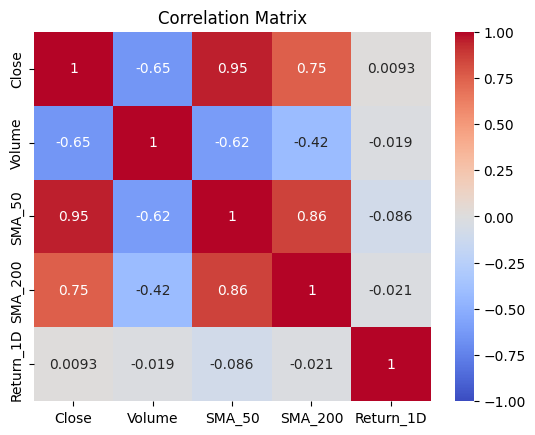

In [ ]:
# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()